In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, f1_score, fbeta_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from datetime import date
import time

import numpy as np
from statistics import mean
from sklearn.impute import KNNImputer
from sklearn import preprocessing

import matplotlib.pyplot as plt

from pyAgrum.lib.bn2roc import showROC_PR

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [3]:
import pyAgrum as gum

In [4]:
import pyAgrum.skbn as skbn
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.explain as exp

In [5]:
df = pd.read_csv('df_pretreat_v2.csv')

In [6]:
for col in df.describe(include='object').columns:
    df[col] = df[col].astype('str') 

# Apprentissage

In [7]:
def apprentissage(df, learningMethod, scoringType, beta=1, usePR=True, courbes=True) :
    X_train, X_test, Y_train, Y_test = train_test_split(df.drop('cible', axis=1), df['cible'],
                                                        shuffle=True, test_size=0.25)

    cl = skbn.BNClassifier(learningMethod=learningMethod, scoringType=scoringType, usePR=usePR,beta=beta,
                           discretizationThreshold=33)
    cl.fit(X_train, Y_train)
    y_test_pred = cl.predict(X_test)

    print(f"F-score : {f1_score(Y_test, y_test_pred):.2f}")
    print(f"F2-score : {fbeta_score(Y_test, y_test_pred, beta=2):.2f}")
    print(f"Precision : {precision_recall_fscore_support(Y_test, y_test_pred)[0][1]:.2f}")
    print(f"Recall : {precision_recall_fscore_support(Y_test, y_test_pred)[1][1]:.2f}")
    print(f"Accuracy : {accuracy_score(Y_test, y_test_pred):.2f}")

    #print("Confusion Matrix")
    #print(confusion_matrix(Y_test, y_test_pred))
    cm = confusion_matrix(Y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    plt.figure()
    disp.plot()
    plt.show()

    if courbes :
        df_test = pd.concat([X_test, Y_test], axis=1)
        gum.lib.bn2roc.showROC_PR(cl.bn,df_test,'cible', 1, beta=beta, show_progress=True,
                                  show_fig=True, save_fig=True, with_labels=True)

    return cl

## Naive Bayes

F-score : 0.41
Precision : 0.36
Recall : 0.47
Accuracy : 0.81


<Figure size 640x480 with 0 Axes>

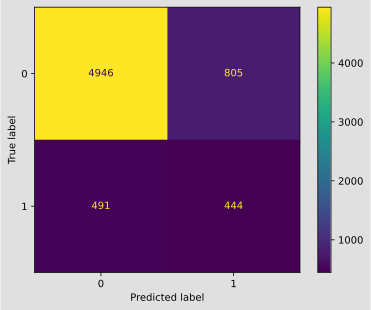

dataframe: 100%|███████████████████████████████████████████████████████████████|


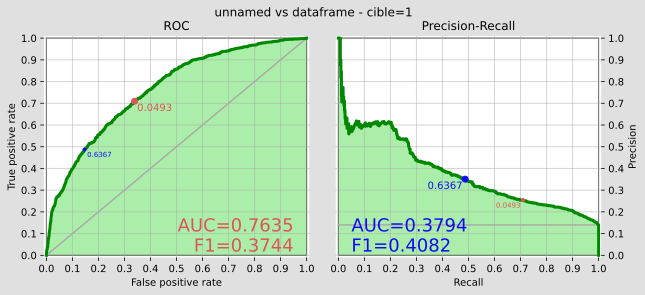

In [8]:
cl_NB = apprentissage(df, learningMethod='NaiveBayes', scoringType='BDeu', usePR=True)

F-score : 0.37
Precision : 0.24
Recall : 0.86
Accuracy : 0.56


<Figure size 640x480 with 0 Axes>

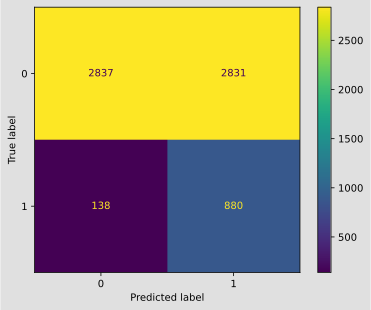

dataframe: 100%|███████████████████████████████████████████████████████████████|


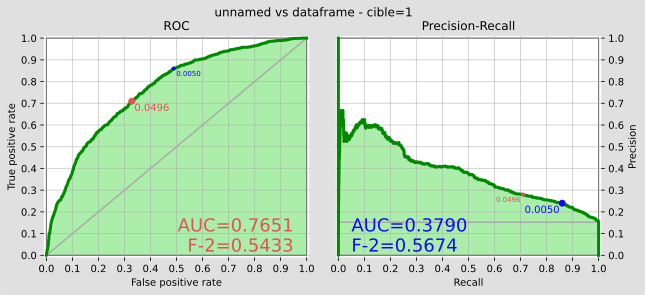

In [9]:
cl_NB = apprentissage(df, learningMethod='NaiveBayes', scoringType='BDeu', beta=2, usePR=True)

## Greedy Hill Climbing

[aGrUM notification] The BDeu score already contains a different 'implicit' prior. Therefore, the learning will probably be biased.
F-score : 0.50
Precision : 0.49
Recall : 0.51
Accuracy : 0.85


<Figure size 640x480 with 0 Axes>

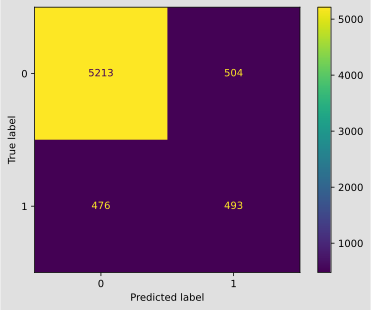

dataframe: 100%|███████████████████████████████████████████████████████████████|


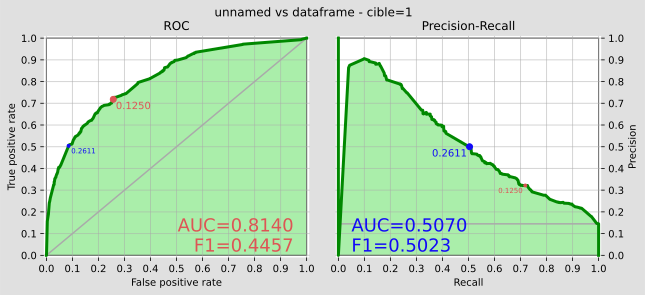

In [10]:
cl_GHC = apprentissage(df, learningMethod='GHC', scoringType='BDeu')

[aGrUM notification] The BDeu score already contains a different 'implicit' prior. Therefore, the learning will probably be biased.
F-score : 0.46
Precision : 0.32
Recall : 0.80
Accuracy : 0.73


<Figure size 640x480 with 0 Axes>

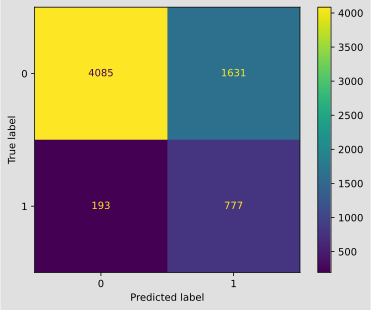

dataframe: 100%|███████████████████████████████████████████████████████████████|


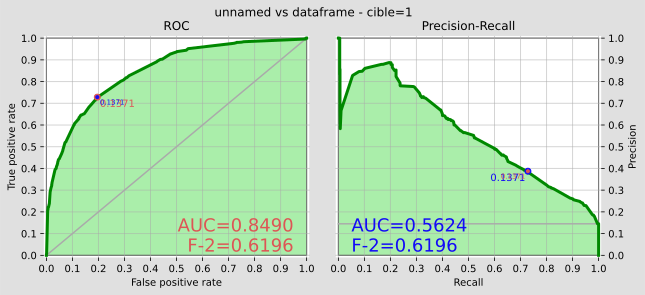

In [11]:
cl_GHC = apprentissage(df, learningMethod='GHC', scoringType='BDeu', beta=2)

In [22]:
cl_GHC.MarkovBlanket

(pyAgrum.BayesNet<double>@0x2cfdc5e00) BN{nodes: 15, arcs: 17, domainSize: 165888, dim: 9328, mem: 145Ko 360o}

In [18]:
gnb.showInference(cl_GHC.MarkovBlanket)

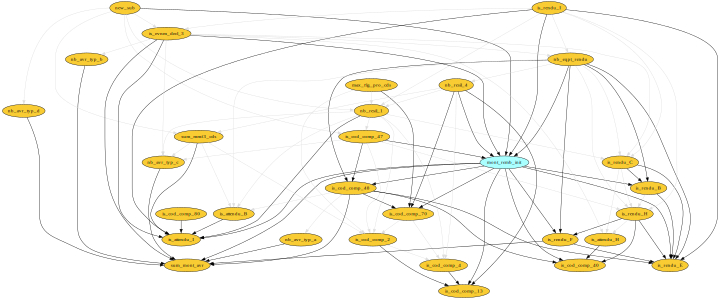

In [21]:
gnb.showGraph(exp.nestedMarkovBlankets(cl_GHC.bn, 'mont_remb_init',1), size='10!')

In [24]:
len(exp.nestedMarkovBlanketsNames(cl_GHC.bn, 'cible',2))

136

## MIIC

[aGrUM notification] The BDeu score already contains a different 'implicit' prior. Therefore, the learning will probably be biased.
F-score : 0.45
Precision : 0.48
Recall : 0.42
Accuracy : 0.85


<Figure size 640x480 with 0 Axes>

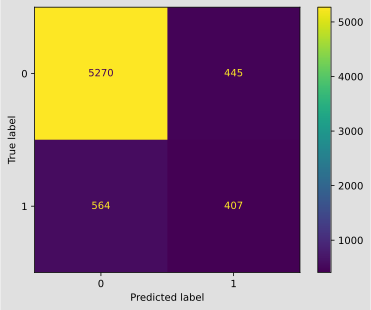

dataframe: 100%|███████████████████████████████████████████████████████████████|


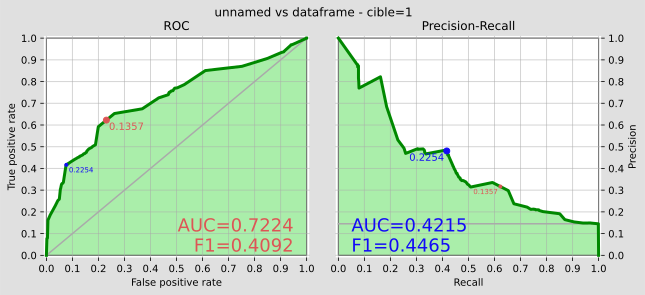

In [12]:
cl_MIIC = apprentissage(df, learningMethod='MIIC', scoringType='BDeu')

In [15]:
cl_MIIC.MarkovBlanket

(pyAgrum.BayesNet<double>@0x16c37f200) BN{nodes: 12, arcs: 13, domainSize: 51840, dim: 177, mem: 2Ko 168o}

[aGrUM notification] The BDeu score already contains a different 'implicit' prior. Therefore, the learning will probably be biased.
F-score : 0.42
Precision : 0.32
Recall : 0.63
Accuracy : 0.74


<Figure size 640x480 with 0 Axes>

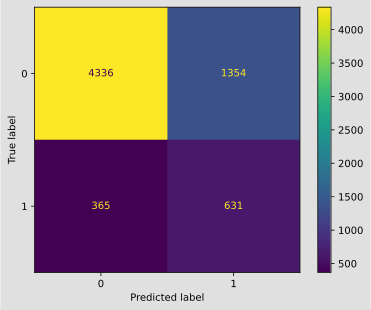

dataframe: 100%|███████████████████████████████████████████████████████████████|


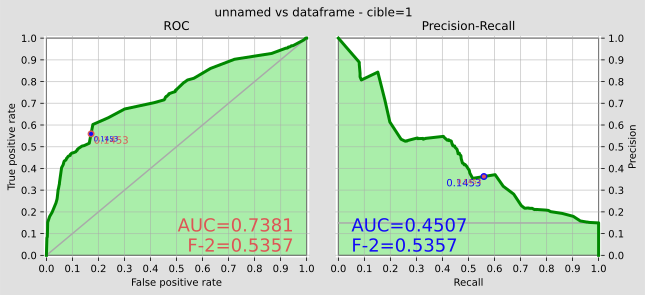

In [13]:
cl_MIIC = apprentissage(df, learningMethod='MIIC', scoringType='BDeu', beta=2)

In [ ]:
#skbn.BNClassifier(learningMethod='',scoringType='BDeu', sePR=True, beta=2)
#"BNClassifier",            

In [18]:
bn_miic = gum.loadBN('bn_shap_2023-07-05.bifxml')

In [24]:
ClassfromBN = skbn.BNClassifier(significant_digit = 7)


In [25]:
ClassfromBN.fromTrainedModel(bn = bn_miic, targetAttribute = 'cible', targetModality = '1',
                             threshold = 0.5)

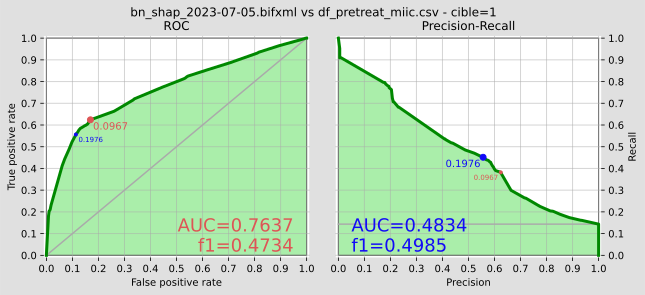

In [29]:
ClassfromBN.showROC_PR('df_pretreat_miic.csv')

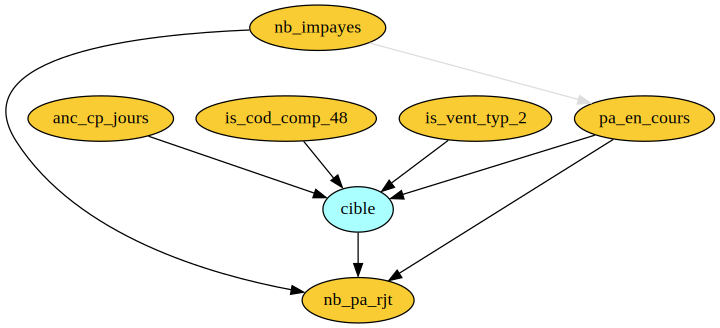

In [19]:
gnb.showGraph(exp.nestedMarkovBlankets(bn_miic, 'cible',1), size='10!')

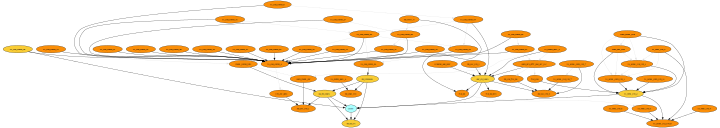

In [20]:
gnb.showGraph(exp.nestedMarkovBlankets(bn_miic, 'cible',2), size='10!')

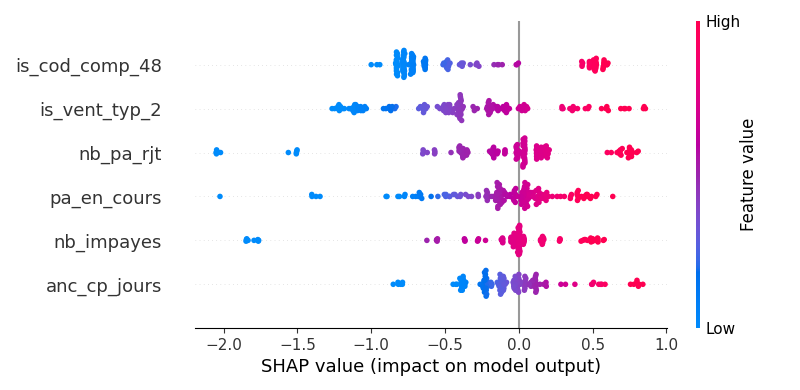

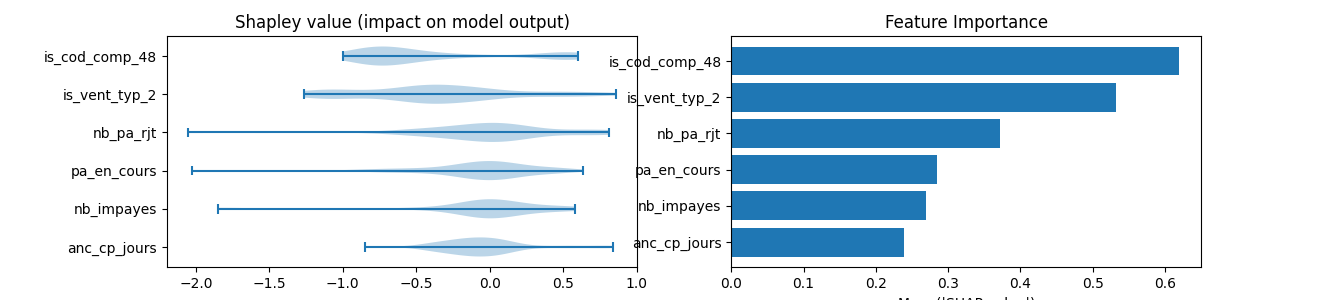

## Other ML models

In [16]:
df_label = df.copy()

for col in df_label.columns:
    if df_label[col].dtype == object:
        lb_make = preprocessing.LabelEncoder()
        df_label[col] = lb_make.fit_transform(df_label[col])

Logistic Regression


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F-score : 0.37
F2-score : 0.29
Precision : 0.68
Recall : 0.26
Accuracy : 0.88


Decision Tree
F-score : 0.42
F2-score : 0.43
Precision : 0.42
Recall : 0.43
Accuracy : 0.83


Random Forest
F-score : 0.42
F2-score : 0.34
Precision : 0.73
Recall : 0.30
Accuracy : 0.88


Neural Net


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


F-score : 0.48
F2-score : 0.46
Precision : 0.51
Recall : 0.45
Accuracy : 0.86


AdaBoost
F-score : 0.39
F2-score : 0.31
Precision : 0.70
Recall : 0.28
Accuracy : 0.87


Naive Bayes
F-score : 0.25
F2-score : 0.45
Precision : 0.15
Recall : 0.96
Accuracy : 0.19


QDA


/opt/homebrew/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


F-score : 0.22
F2-score : 0.29
Precision : 0.15
Recall : 0.37
Accuracy : 0.63


XgBoost
F-score : 0.49
F2-score : 0.42
Precision : 0.71
Recall : 0.38
Accuracy : 0.89




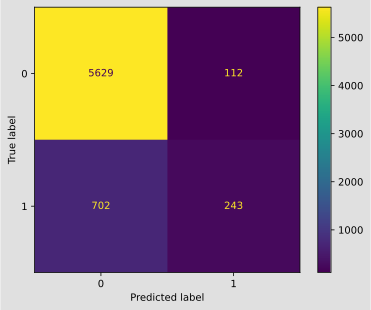

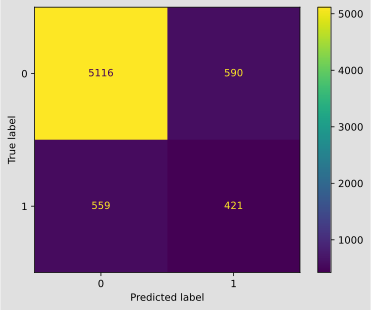

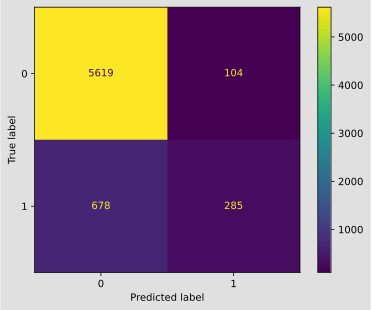

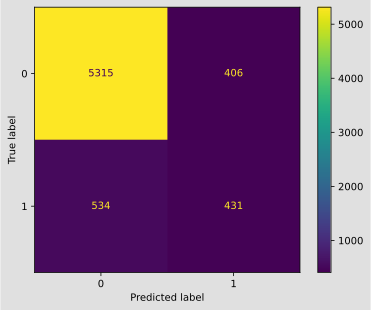

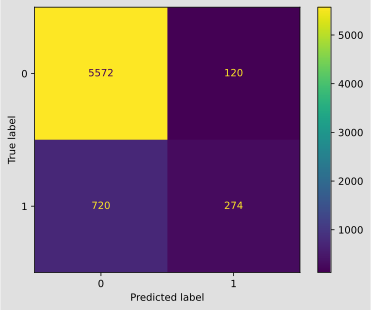

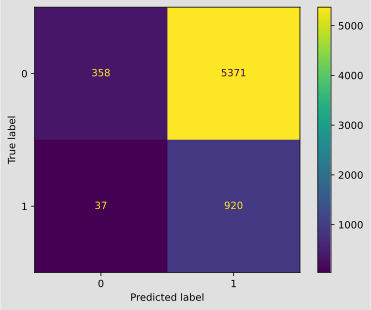

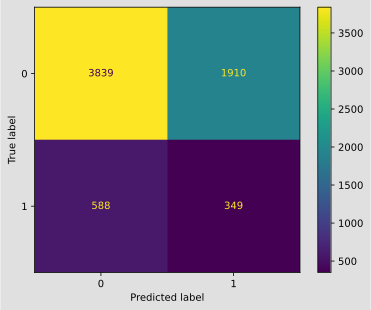

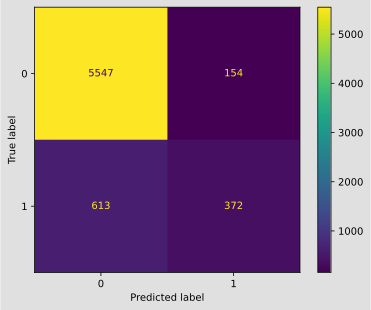

In [34]:

names = ["Logistic Regression", "Decision Tree", "Random Forest", 
         "Neural Net", "AdaBoost", "Naive Bayes", "QDA", "XgBoost"]

classifiers = [LogisticRegression(max_iter=1000), DecisionTreeClassifier(), RandomForestClassifier(),
               MLPClassifier(), AdaBoostClassifier(), GaussianNB(), QuadraticDiscriminantAnalysis(), XGBClassifier()]
    
res = []


for cla in range(len(classifiers)) :
    print(names[cla])

    X_train, X_test, Y_train, Y_test = train_test_split(df_label.drop('cible', axis=1), df_label['cible'],
                                                        shuffle=True, test_size=0.25)
    df_test = pd.concat([X_test, Y_test], axis=1)
    #df_test[cible] = df_test[cible].astype('int32')
    df_test.to_csv(str(date.today())+ "_df_test.csv",index=False)

                
    cl = classifiers[cla]

    try : 
        cl.fit(X_train, Y_train)

    except  Exception as error:
        print("An exception occurred:", type(error).__name__, "–", error)
        break 

    y_test_pred = cl.predict(X_test)

    res.append(fbeta_score(Y_test, y_test_pred, beta=2))

    print(f"F-score : {f1_score(Y_test, y_test_pred):.2f}")
    print(f"F2-score : {fbeta_score(Y_test, y_test_pred, beta=2):.2f}")
    print(f"Precision : {precision_recall_fscore_support(Y_test, y_test_pred)[0][1]:.2f}")
    print(f"Recall : {precision_recall_fscore_support(Y_test, y_test_pred)[1][1]:.2f}")
    print(f"Accuracy : {accuracy_score(Y_test, y_test_pred):.2f}")
    #print("Confusion Matrix")
    #print(confusion_matrix(Y_test, y_test_pred))
    #plt.figure()
    cm = confusion_matrix(Y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    #plt.show()
    
    print('\n')


